# EXPLORATORY DATA ANALYSIS

##### Will perform EDA on the dataset so as to have more information on the disease in question, and gain some business driven insights that might help hospitals or the medical field

In [1]:
# Import necessary data analysis and vizualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Permanent size for plots
sns.set(rc = {'figure.figsize':(12, 8)})

In [4]:
# Load the clean dataset
data = pd.read_csv('Datasets/clean_hypothyroid2.csv')
data.head()

,Unnamed: 0,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,output
0,0,41,F,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,0
1,1,70,F,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,0
2,2,80,F,f,f,f,f,f,f,f,...,f,f,f,2.20,0.6,80.0,0.70,115.0,SVI,0
3,3,66,F,f,f,f,f,f,f,f,...,t,f,f,0.60,2.2,123.0,0.93,132.0,SVI,0
4,4,68,M,f,f,f,f,f,f,f,...,f,f,f,2.40,1.6,83.0,0.89,93.0,SVI,0


In [5]:
# Drop the redundant index column
data.drop(columns=('Unnamed: 0'), axis=1, inplace=True)

data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,output
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,0
1,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,0
2,80,F,f,f,f,f,f,f,f,f,...,f,f,f,2.20,0.6,80.0,0.70,115.0,SVI,0
3,66,F,f,f,f,f,f,f,f,f,...,t,f,f,0.60,2.2,123.0,0.93,132.0,SVI,0
4,68,M,f,f,f,f,f,f,f,f,...,f,f,f,2.40,1.6,83.0,0.89,93.0,SVI,0


## Univariate non-graphical Analysis

#### Average age of patients 

In [6]:
# Average age
data['age'].mean()

52.752273554019645

the mean age of hypothyroid patients is 52 years

### Statistical summary of ages of patients

In [7]:
data['age'].describe()

count    2749.000000
mean       52.752274
std        18.852394
min         1.000000
25%        37.000000
50%        55.000000
75%        68.000000
max        94.000000
Name: age, dtype: float64

## Univariate Graphical analysis

### Distribution of patients' age

Text(0, 0.5, 'number of patients')

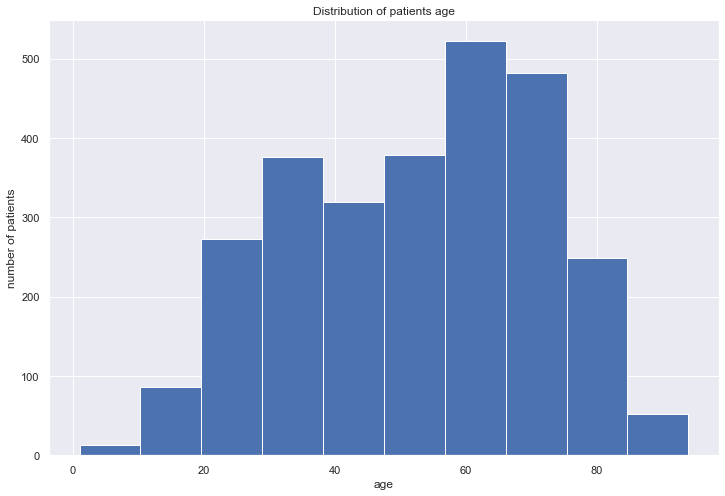

In [14]:
# Distribution of patient's age

data['age'].hist()
plt.title('Distribution of patients age')
plt.xlabel('age')
plt.ylabel('number of patients')

The distribution of patients' age is slightly skewed to the right. This indicates that the disease under study often affects the older generation (people over 50 years old)

### Gender of patients

<AxesSubplot:xlabel='sex', ylabel='count'>

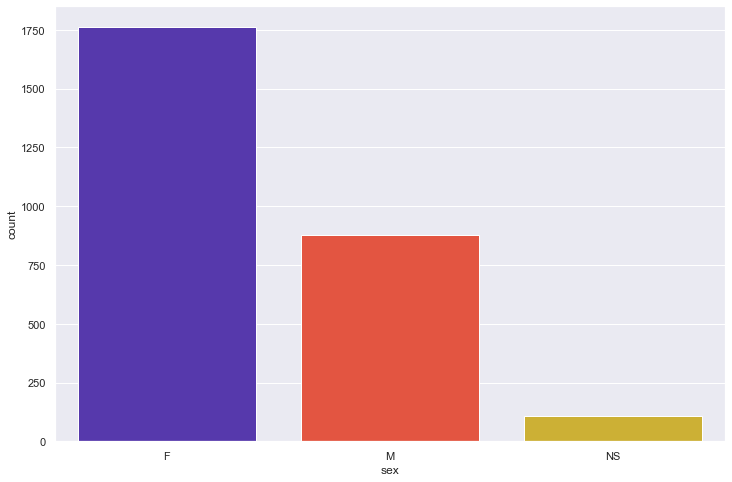

In [23]:
sns.countplot(data = data, x = 'sex', palette = 'CMRmap')

As seen, there are more female patients than male, almost double. A few number of patients did not specify their gender.

### Patients on thyroxine medication

<AxesSubplot:xlabel='on thyroxine', ylabel='count'>

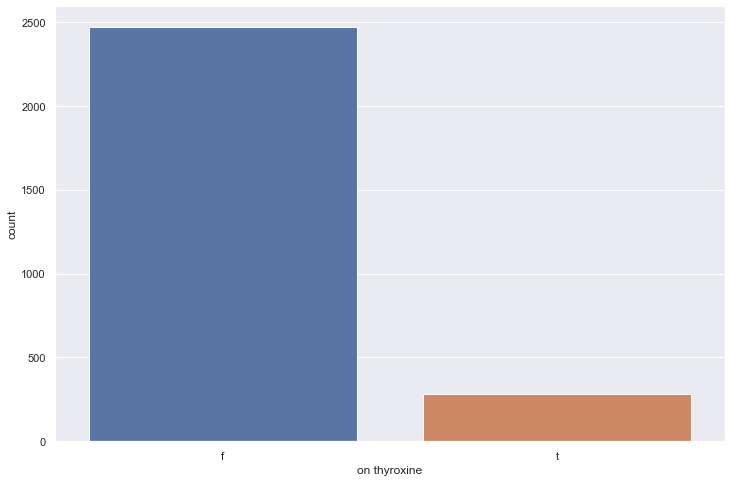

In [26]:
sns.countplot(data = data, x = 'on thyroxine')

Most of the patients are not on thyroxine medication.

### Sickly patients

<AxesSubplot:xlabel='sick', ylabel='count'>

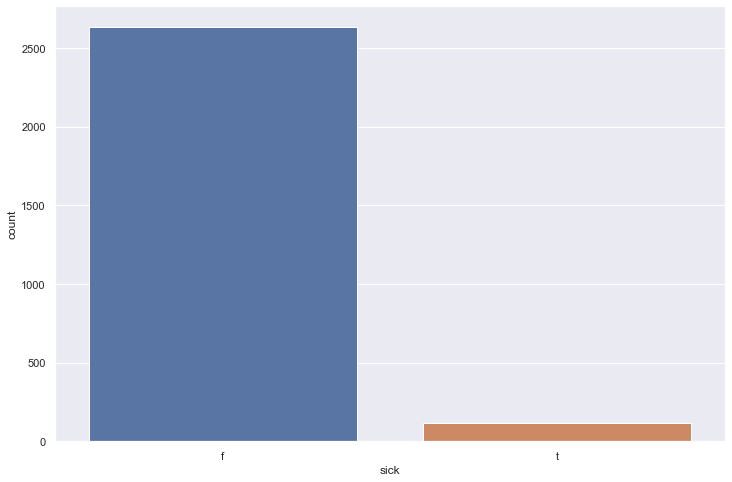

In [27]:
sns.countplot(data = data, x = 'sick')

Most of the patients are of healthy stature. This shows that patients suffering from the ailment can appear as they are normal.

### Pregnant patients

<AxesSubplot:xlabel='pregnant', ylabel='count'>

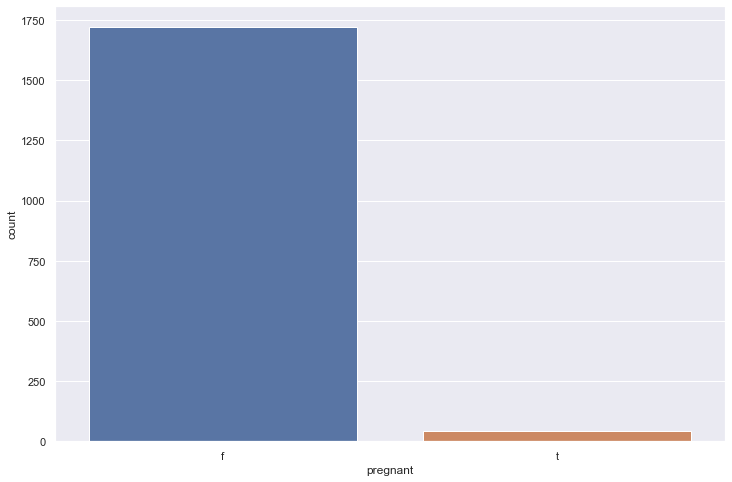

In [29]:
# Hav eto condition to when sex = F

data_female = data[data['sex'] == 'F']

# Plot
sns.countplot(data = data_female, x = 'pregnant')

AN overwhelmong percentage of female patients were not pregnant

### Source of referal

<AxesSubplot:xlabel='referral source', ylabel='count'>

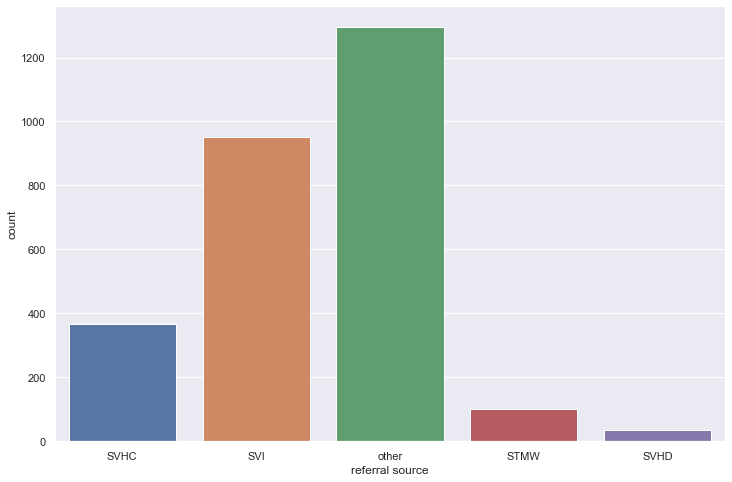

In [30]:
sns.countplot(data = data, x = 'referral source')

Most of the patients were refered by an unknown source, followed by SVI and SVHC

## Bivariate Analysis

This is where two columns/features are plotted against each other and any trends are noted.

### Age vs TSH score

In [17]:
df = pd.read_csv('Datasets/modeling_hypothyroid.csv')
df.drop(columns=('Unnamed: 0'), axis=1, inplace=True)
df.head()

,age,on thyroxine,thyroid surgery,TSH,T3,TT4,T4U,FTI,output
0,41,0,0,1.30,2.5,125.0,1.14,109.0,0
1,70,0,0,0.72,1.2,61.0,0.87,70.0,0
2,80,0,0,2.20,0.6,80.0,0.70,115.0,0
3,66,0,0,0.60,2.2,123.0,0.93,132.0,0
4,68,0,0,2.40,1.6,83.0,0.89,93.0,0


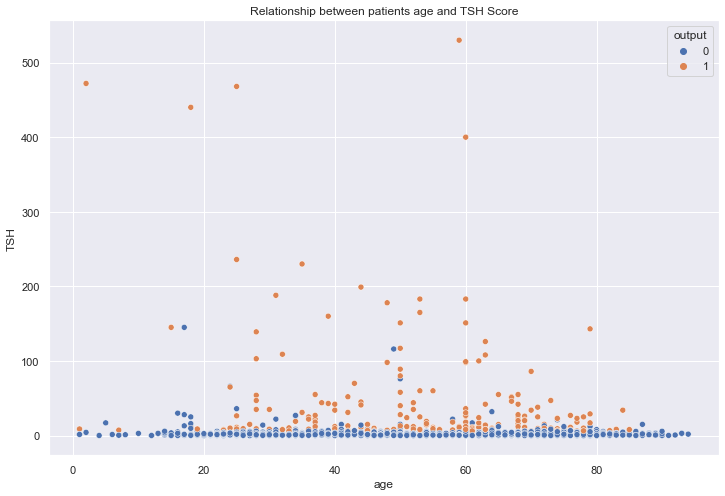

In [10]:
sns.scatterplot(data = df, x='age', y='TSH', hue='output')
plt.title('Relationship between patients age and TSH Score')
plt.show()

As seen, there is no relationship between the age of the patients and the TSH value.

A neat observation from the scatter plot is that patients with hypothyroid disease, regardless of their age, had higher TSH scores than patients without hypothyroid

### Age vs FTI value

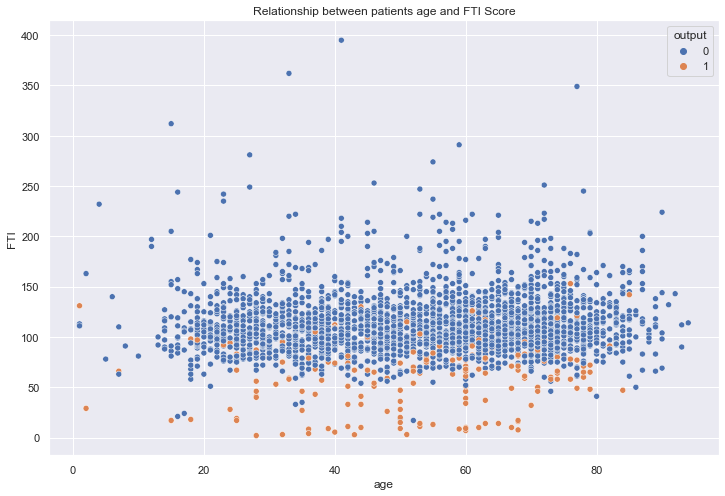

In [9]:
sns.scatterplot(data = df, x='age', y='FTI', hue='output')
plt.title('Relationship between patients age and FTI Score')
plt.show()

Regardless of their ages, patients with hypothuroid disease had lower FTI scores than patients with hypothyroid disease

### Age vs TT4 score

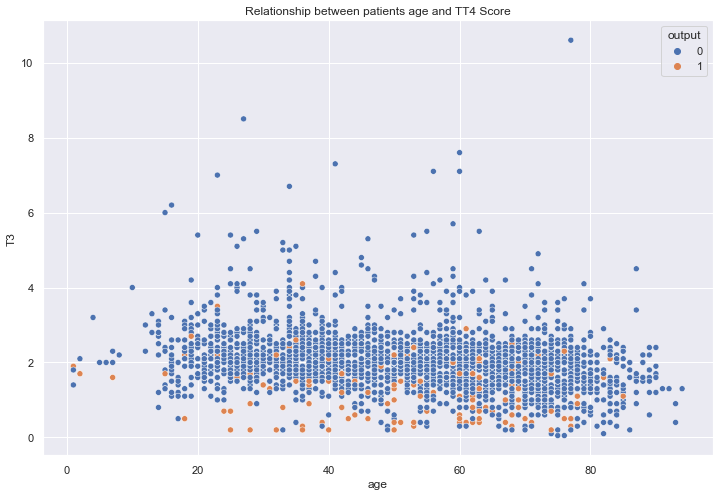

In [12]:
sns.scatterplot(data = df, x='age', y='T3', hue='output')
plt.title('Relationship between patients age and T3 Score')
plt.show()

No relationship between patient's age/status with their T3 score

## Multivariate analysis

This is where more than two features are plotted and relationships derived from the result, if any

### Correlation

In [18]:
df.corr()

,age,on thyroxine,thyroid surgery,TSH,T3,TT4,T4U,FTI,output
age,1.000000,-0.000934,-0.026119,-0.059527,-0.261801,-0.059778,-0.187546,0.054345,-0.000478
on thyroxine,-0.000934,1.000000,0.049371,0.012537,0.015725,0.201695,0.053840,0.174117,-0.069222
thyroid surgery,-0.026119,0.049371,1.000000,0.031589,-0.026484,-0.020671,0.037694,-0.037729,-0.021195
TSH,-0.059527,0.012537,0.031589,1.000000,-0.156698,-0.278551,0.069230,-0.319469,0.440940
T3,-0.261801,0.015725,-0.026484,-0.156698,1.000000,0.571392,0.457730,0.337120,-0.194518
TT4,-0.059778,0.201695,-0.020671,-0.278551,0.571392,1.000000,0.438543,0.790097,-0.317419
T4U,-0.187546,0.053840,0.037694,0.069230,0.457730,0.438543,1.000000,-0.174522,0.021676
FTI,0.054345,0.174117,-0.037729,-0.319469,0.337120,0.790097,-0.174522,1.000000,-0.354663
output,-0.000478,-0.069222,-0.021195,0.440940,-0.194518,-0.317419,0.021676,-0.354663,1.000000


Most of the features have low negative correlation with each other. This means that when one feature's value increases, the other decreases e.g. age and TSH score.

Features such as TT4 and FTI have a strong positive correlation with each other. This means that a patient with a high TT4 score statistically has a higher FTI score as well

### Correlation heatmap

<AxesSubplot:>

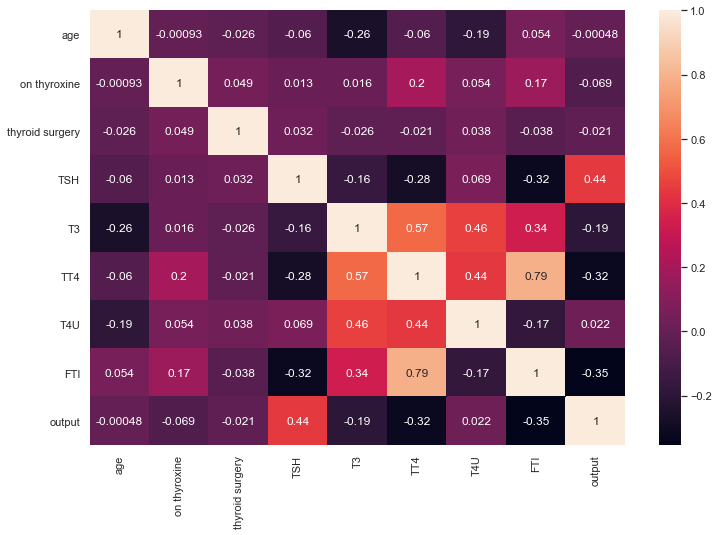

In [20]:
sns.heatmap(df.corr(), annot=True)

Here is a visual representation of the correlations, light red representing a strong correlation and dark purple representing a weak correlation, even a negative one.